# Transportation theory 1

https://www.coin-or.org/PuLP/CaseStudies/a_transportation_problem.html


In [1]:
from pulp import *

# tłumaczenie wzorów matematycznych

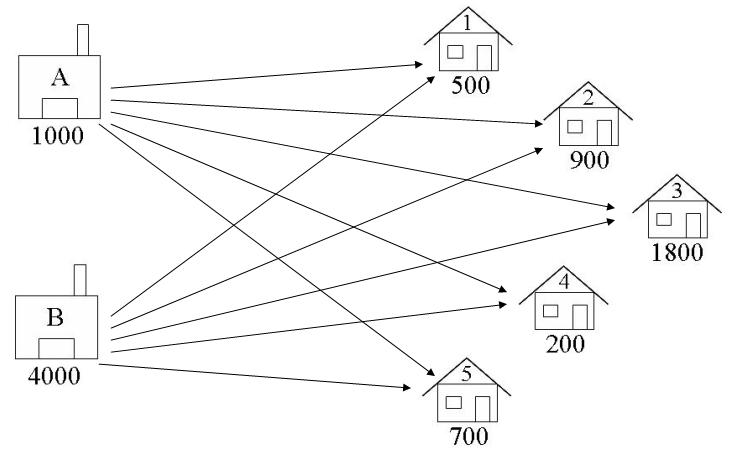

Są dwa browary i 5 pubów gdzie dostarcza się piwo

<span style="font-size: 150%;color:#0000ff"> {...} zbiór (złożony z) elementów (elementy oddzielane przecinkami lub średnikami)



$
W = \{ A,B\} \\
B = \{ 1,2,3,4,5\} \\
\text{W - to zbiór wszystkich magazynów} \\
\text{B - to zbiór wszystkich pabów} \\
$

$
{x_{(w,b)\,}}  \geqslant 0 \\
\text{x - symbolizuje ilość transportów, ta ilość transportów może być tylko większa równa zero} \\
\text{ponieważ nie przewiduje sie tu wartości ujemnych} \\
$

<span style="font-size: 150%;color:#0000ff"> ∀  dla wszystkich

$
{
 \displaystyle {x_{(w,b)\,}}  \geqslant 0  {...} \forall  {w \in W},{b \in B} \\
\text{w,b - ilości dostaw reprezentowanych jako x są wieksze, równe zero} \\
\text{dla każdego elementu zbioru browarów W i pabów B} \\
}
$

$
{
 \displaystyle {x_{(w,b)\,}}  \in \mathbb{Z}^+  {...} \forall  {w \in W},{b \in B} \\
\text{w,b - ilości dostaw reprezentowanych jako x należą do zbioru liczb całkowitych dodatnich} \\
\text{dla każdego elementu zbioru browarów W i pabów B} \\
}
$

<font size="6"> 
<font color="blue">     
$\mathbb{Z}^+ \\    
\text{zbiór liczb całkowitych dodatnich} \\
$

## Funkcja celu

### suma kosztów jednostkowych transportów browaru w1 do pabu b4

$\displaystyle \sum_{ {w_1 \in W},{b_1 \in B}} c_{(w_1,b_4)} $

<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {w \in W},{b \in B}} c_{(w,b)}x_{(w,b)} \to  min 
$


<font size="2"> 
<font color="grey">   
$
\text{Funkcja celu zmierza do minimalizacji sumy kosztów transportu z browarów W do pabów B} \\
\text{Suma kosztów transportu to suma iloczynów c - kosztów jednostkowych na skrzynkę i x -ilości skrzynek}
$

# Suma ograniczeń S

- A1 = liczba skrzynek piwa do wysłania z magazynu A do baru 1
- A5 = liczba skrzynek piwa do wysłania z magazynu A do baru 5
- B1 = liczba skrzynek piwa do wysyłki z magazynu B do baru 1
- B5 = liczba skrzynek piwa do wysyłki z magazynu B do baru 5



#### $
\left\{
\begin{align} 
{A_1+A_2+A_3+A_4+A_5} & \leqslant 1000 & (1)\\
{B_1+B_2+B_3+B_4+B_5} & \leqslant 4000 & (2)\\
\end{align}
\right. 
$



<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {b \in B}} x_{(w,b)} \leqslant  S_w {...} \forall  {w \in W}
$


<font size="2"> 
<font color="grey">   
$
\text{ilość skrzynek x nie może być większ niż ilość skrzynek w magazynie} \\
\text{z którego te skrzynki są transportowane}
$

## Równania zapotrzebowań

Zapotrzebowanie na piwo w barze 1 to 500 skrzynek, więc ilość dostarczonego tam piwa musi wynosić co najmniej 500, aby uniknąć utraty sprzedaży. Podobnie, biorąc pod uwagę kwoty dostarczone do innych pabów, muszą być co najmniej równe popytowi w tych barach. Suma wartości na wszystkich trasach prowadzących do pubów musi być większa lub równa wartości zapotrzebowania w tych pubach:

skrzynki piwa można ściągać z browaru A i browaru B

#### $
\left\{
\begin{align} 
{A_1+B_1} & \geqslant 500 & (1)\\
{A_2+B_2} & \geqslant 900 & (2)\\
{A_3+B_3} & \geqslant 1800 & (3)\\
{A_4+B_4} & \geqslant 200 & (4)\\
{A_5+B_5} & \geqslant 700 & (5)\\
\end{align}
\right. 
$

<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {b \in B}, {w \in W}} x_{(w,b)} \geqslant  d_b {...} \forall  {b \in B}
$


<font size="2"> 
<font color="grey">   
$
\text{ilość skrzynek x dostarczanych z browaru w do pubu b nie może być mniejsza niż popyt d} \\
\text{jaki występuje w danym pubie b, dla każdego pubu b ze zbioru pubów B}
$

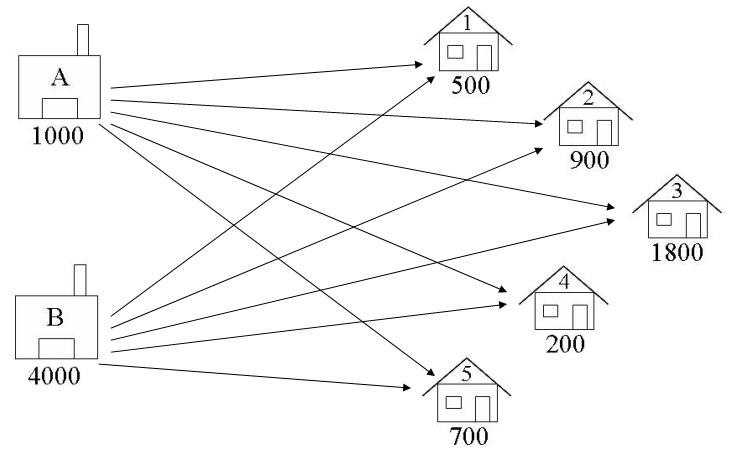

In [2]:
"""
The Beer Distribution Problem for the PuLP Modeller

Authors: Antony Phillips, Dr Stuart Mitchell    2007
"""

# Import PuLP modeller functions
from pulp import *

In [3]:
# Creates a list of all the supply nodes
Warehouses = ["A","B"]

# Creates a dictionary for the number of units of supply for each supply node
supply = {"A": 1000,
        "B": 4000}

# Creates a list of all demand nodes
Bars = ["1", "2", "3", "4", "5"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {"1": 500,
        "2": 900,
        "3": 1800,
        "4": 200,
        "5": 700}
print('Warehouses:',Warehouses)
print('supply:',supply)
print('Bars:',Bars)
print('Demand:',demand)

Warehouses: ['A', 'B']
supply: {'A': 1000, 'B': 4000}
Bars: ['1', '2', '3', '4', '5']
Demand: {'1': 500, '2': 900, '3': 1800, '4': 200, '5': 700}


In [4]:
# Creates a list of costs of each transportation path
#Bars
#P1 P2 P3 P4 P5
costs = [   
         [2,4,5,2,1],#A  Warehouses
        [3,1,3,2,3] #B
         ]

## Można zrobić prostą tabelę kosztów transportu, zmapować koszty

        - lepiej wizualizuje zadanie

In [5]:

from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Meble:", "Pub:1","Pub:2","Pub:3", "Pub:4","Pub:5"]
table.append_row(["Hurtownia A",      2,    4,    5,   2,    1 ])
table.append_row(["Hurtownia B",      3,    1,    3,   2,    3 ])
print(table)

+-------------+-------+-------+-------+-------+-------+
|   Meble:    | Pub:1 | Pub:2 | Pub:3 | Pub:4 | Pub:5 |
+-------------+-------+-------+-------+-------+-------+
| Hurtownia A |   2   |   4   |   5   |   2   |   1   |
+-------------+-------+-------+-------+-------+-------+
| Hurtownia B |   3   |   1   |   3   |   2   |   3   |
+-------------+-------+-------+-------+-------+-------+


In [6]:
# The cost data is made into a dictionary
costs = makeDict([Warehouses,Bars],costs,0)
costs

{'A': {'1': 2, '2': 4, '3': 5, '4': 2, '5': 1},
 'B': {'1': 3, '2': 1, '3': 3, '4': 2, '5': 3}}

In [7]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Beer Distribution Problem",LpMinimize)
print(prob)

Beer_Distribution_Problem:
MINIMIZE
None
VARIABLES



/home/wojciech/anaconda3/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


<span style="font-size: 150%;color:#073763;background:#9fc5e8">Funkcja generująca wszystkie warianty</span>  

In [8]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in Warehouses for b in Bars]
print(Routes)

[('A', '1'), ('A', '2'), ('A', '3'), ('A', '4'), ('A', '5'), ('B', '1'), ('B', '2'), ('B', '3'), ('B', '4'), ('B', '5')]


In [9]:
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Warehouses,Bars),0,None,LpInteger)
vars

{'A': {'1': Route_A_1,
  '2': Route_A_2,
  '3': Route_A_3,
  '4': Route_A_4,
  '5': Route_A_5},
 'B': {'1': Route_B_1,
  '2': Route_B_2,
  '3': Route_B_3,
  '4': Route_B_4,
  '5': Route_B_5}}

<span style="font-size: 150%;color:#073763;background:#9fc5e8">Funkcja celu</span>  

        warianty * koszty tych wariantów

In [10]:
# The objective function is added to 'prob' first
prob += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]), "Sum_of_Transporting_Costs"
prob

Beer_Distribution_Problem:
MINIMIZE
2*Route_A_1 + 4*Route_A_2 + 5*Route_A_3 + 2*Route_A_4 + 1*Route_A_5 + 3*Route_B_1 + 1*Route_B_2 + 3*Route_B_3 + 2*Route_B_4 + 3*Route_B_5 + 0
VARIABLES
0 <= Route_A_1 Integer
0 <= Route_A_2 Integer
0 <= Route_A_3 Integer
0 <= Route_A_4 Integer
0 <= Route_A_5 Integer
0 <= Route_B_1 Integer
0 <= Route_B_2 Integer
0 <= Route_B_3 Integer
0 <= Route_B_4 Integer
0 <= Route_B_5 Integer

<span style="font-size: 150%;color:#073763;background:#9fc5e8">Zapisanie ograniczeń</span>  

        wersje * dla kazdego baru <= zapotrzebowanie baru

In [11]:
# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += lpSum([vars[w][b] for b in Bars])<=supply[w], "Sum_of_Products_out_of_Warehouse_%s"%w
prob

Beer_Distribution_Problem:
MINIMIZE
2*Route_A_1 + 4*Route_A_2 + 5*Route_A_3 + 2*Route_A_4 + 1*Route_A_5 + 3*Route_B_1 + 1*Route_B_2 + 3*Route_B_3 + 2*Route_B_4 + 3*Route_B_5 + 0
SUBJECT TO
Sum_of_Products_out_of_Warehouse_A: Route_A_1 + Route_A_2 + Route_A_3
 + Route_A_4 + Route_A_5 <= 1000

Sum_of_Products_out_of_Warehouse_B: Route_B_1 + Route_B_2 + Route_B_3
 + Route_B_4 + Route_B_5 <= 4000

VARIABLES
0 <= Route_A_1 Integer
0 <= Route_A_2 Integer
0 <= Route_A_3 Integer
0 <= Route_A_4 Integer
0 <= Route_A_5 Integer
0 <= Route_B_1 Integer
0 <= Route_B_2 Integer
0 <= Route_B_3 Integer
0 <= Route_B_4 Integer
0 <= Route_B_5 Integer

In [12]:
# The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += lpSum([vars[w][b] for w in Warehouses])>=demand[b], "Sum_of_Products_into_Bar%s"%b
prob

Beer_Distribution_Problem:
MINIMIZE
2*Route_A_1 + 4*Route_A_2 + 5*Route_A_3 + 2*Route_A_4 + 1*Route_A_5 + 3*Route_B_1 + 1*Route_B_2 + 3*Route_B_3 + 2*Route_B_4 + 3*Route_B_5 + 0
SUBJECT TO
Sum_of_Products_out_of_Warehouse_A: Route_A_1 + Route_A_2 + Route_A_3
 + Route_A_4 + Route_A_5 <= 1000

Sum_of_Products_out_of_Warehouse_B: Route_B_1 + Route_B_2 + Route_B_3
 + Route_B_4 + Route_B_5 <= 4000

Sum_of_Products_into_Bar1: Route_A_1 + Route_B_1 >= 500

Sum_of_Products_into_Bar2: Route_A_2 + Route_B_2 >= 900

Sum_of_Products_into_Bar3: Route_A_3 + Route_B_3 >= 1800

Sum_of_Products_into_Bar4: Route_A_4 + Route_B_4 >= 200

Sum_of_Products_into_Bar5: Route_A_5 + Route_B_5 >= 700

VARIABLES
0 <= Route_A_1 Integer
0 <= Route_A_2 Integer
0 <= Route_A_3 Integer
0 <= Route_A_4 Integer
0 <= Route_A_5 Integer
0 <= Route_B_1 Integer
0 <= Route_B_2 Integer
0 <= Route_B_3 Integer
0 <= Route_B_4 Integer
0 <= Route_B_5 Integer

In [13]:
# The problem data is written to an .lp file
prob.writeLP("BeerDistributionProblem.lp")

[Route_A_1,
 Route_A_2,
 Route_A_3,
 Route_A_4,
 Route_A_5,
 Route_B_1,
 Route_B_2,
 Route_B_3,
 Route_B_4,
 Route_B_5]

In [14]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

1

In [15]:
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


In [16]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Route_A_1 = 300.0
Route_A_2 = 0.0
Route_A_3 = 0.0
Route_A_4 = 0.0
Route_A_5 = 700.0
Route_B_1 = 200.0
Route_B_2 = 900.0
Route_B_3 = 1800.0
Route_B_4 = 200.0
Route_B_5 = 0.0


In [17]:
# The optimised objective function value is printed to the screen    
print("Total Cost of Transportation = ", value(prob.objective))

Total Cost of Transportation =  8600.0


# <span style="color:blue"> Przyklad 15 STR. 103

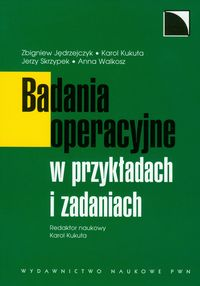

In [18]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["MAGAZYNY:", "Piekarnia:1","Piekarnia:2","Piekarnia:3","Piekarnia:4", "Ilość dostaw z magazynów Ai"]
table.append_row(["Magazyn: 1",   50,    40,   50, 20, 70 ])
table.append_row(["Magazyn: 2",   40,    80,   70, 30, 50 ])
table.append_row(["Magazyn: 3",   60,    40,   70, 80, 80 ])
table.append_row(["Popyt piekarni Bj",  40,   60,  50, 50, 200])

print(table)

+-------------+----------+-----------+---------+---------+---------------------+
|  MAGAZYNY:  | Piekarni | Piekarnia | Piekarn | Piekarn | Ilość dostaw z maga |
|             |   a:1    |    :2     |  ia:3   |  ia:4   |      zynów Ai       |
+-------------+----------+-----------+---------+---------+---------------------+
| Magazyn: 1  |    50    |    40     |   50    |   20    |         70          |
+-------------+----------+-----------+---------+---------+---------------------+
| Magazyn: 2  |    40    |    80     |   70    |   30    |         50          |
+-------------+----------+-----------+---------+---------+---------------------+
| Magazyn: 3  |    60    |    40     |   70    |   80    |         80          |
+-------------+----------+-----------+---------+---------+---------------------+
| Popyt pieka |    40    |    60     |   50    |   50    |         200         |
|   rni Bj    |          |           |         |         |                     |
+-------------+----------+--

### Zadania zamknięte
Ilość mąki w magazynie jest taka sama jak popyt piekarni na mąkę (200).

<font size="6"> 
<font color="black">   
$\displaystyle \sum^{3}_{ {i=1}} A_{i} =  \displaystyle \sum^{4}_{ {j=1}} B_{j} = 200 t
$


<font size="2"> 
<font color="grey">   
$
\text{Zamknięte zadanie transportowe (ZZT)} \\
\text{podaż jest równa popytowi}
$

<font size="6"> 
<font color="black"> 
$
{
 \displaystyle {x_{(m,p)\,}}  \geqslant 0  {...} \forall  {m \in M},{p \in P} \\
}
$

<font size="2"> 
<font color="grey">
    
${    
\text{m,p - ilości dostaw reprezentowanych jako x są wieksze, równe zero} \\
\text{dla każdego elementu zbioru magazynów M i piekarni P} \\
}
$

<font size="6"> 
<font color="black"> 
$
{
 \displaystyle {x_{(m,p)\,}}  \in \mathbb{Z}^+  {...} \forall  {m \in M},{p \in P} \\
}
$

<font size="2"> 
<font color="grey">   

$ {   
\text{m,p - ilości dostaw reprezentowanych jako x należą do zbioru liczb całkowitych dodatnich} \\
\text{dla każdego elementu zbioru magazynów M i piekarni P} \\
}
$

<span style="font-size: 150%;color:#0000ff"> Funkcja celu</span>

<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {m \in M},{p \in P}} c_{(m,p)}x_{(m,p)} \to  min 
$


<font size="2"> 
<font color="grey">   
$
\text{Funkcja celu zmierza do minimalizacji sumy kosztów transportu z magazynów M do piekrani P} \\
\text{Suma kosztów transportu to suma iloczynów c - kosztów jednostkowych na tonę i x -ilości ton}
$

<span style="font-size: 100%;color:'black"> Suma ograniczeń S</span>

<span style="font-size: 250%;color:#0000ff"> Dostawcy</span>

#### $
\left\{
\begin{align} 
{M_1.1+M_1.2+M_1.3+M_1.4+M_1.5} & \leqslant 70 & (1)\\
{M_2.1+B_2.2+B_2.3+B_2.4+B_2.5} & \leqslant 50 & (2)\\
{M_3.1+B_3.2+B_3.3+B_3.4+B_3.5} & \leqslant 80 & (2)\\
\end{align}
\right. 
$



<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {b \in B}} x_{(w,b)} \leqslant  S_w {...} \forall  {w \in W}
$


<font size="2"> 
<font color="grey">   
$
\text{ilość skrzynek x nie może być większ niż ilość skrzynek w magazynie} \\
\text{z którego te skrzynki są transportowane}
$

In [19]:
from pulp import *

# Tworze listę dostawców
Warehouses = ["Magazyn1","Magazyn2","Magazyn3"]

# Tworze słownik ile każdy dostawca może dostarczyć towaru
supply = {"Magazyn1": 70,
          "Magazyn2": 50,
          "Magazyn3": 80}

<span style="font-size: 250%;color:#0000ff"> Odbiorcy</span>

tony mąki można ściągać z trzech różnych magazynów

#### $
\left\{
\begin{align} 
{m_1.1+ m_2.1 + m_3.1} & \geqslant 40 & (1)\\
{m_1.2+ m_2.2 + m_3.2} & \geqslant 60 & (2)\\
{m_1.3+ m_2.3 + m_3.3} & \geqslant 50 & (3)\\
{m_1.4+ m_2.4 + m_3.4} & \geqslant 50 & (4)\\
\end{align}
\right. 
$

<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {m \in M}, {p \in P}} x_{(m,p)} \geqslant  d_m {...} \forall  {m \in M}
$


<font size="2"> 
<font color="grey">   
$
\text{ilość ton x dostarczanych z magazynu m do piekarni P nie może być mniejsza niż popyt d} \\
\text{jaki występuje w danej piekarni p, dla każdej piekarni p ze zbioru piekarni P}
$

In [20]:
# Tworzę listę odbiorców
Bars = ["Piekarnia1", "Piekarnia2", "Piekarnia3", "Piekarnia4"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {"Piekarnia1": 40,
        "Piekarnia2": 60,
        "Piekarnia3": 50,
        "Piekarnia4": 50
        }
print('Warehouses:',Warehouses)
print('supply:',supply)
print('Bars:',Bars)
print('Demand:',demand)

Warehouses: ['Magazyn1', 'Magazyn2', 'Magazyn3']
supply: {'Magazyn1': 70, 'Magazyn2': 50, 'Magazyn3': 80}
Bars: ['Piekarnia1', 'Piekarnia2', 'Piekarnia3', 'Piekarnia4']
Demand: {'Piekarnia1': 40, 'Piekarnia2': 60, 'Piekarnia3': 50, 'Piekarnia4': 50}


<span style="font-size: 250%;color:#0000ff"> Tworzę nacierz jednostkowych kosztów transportu</span>

In [21]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["MAGAZYNY:", "Piekarnia:1","Piekarnia:2","Piekarnia:3","Piekarnia:4", "Ilość dostaw z magazynów Ai"]
table.append_row(["Magazyn: 1",   50,    40,   50, 20, 70 ])
table.append_row(["Magazyn: 2",   40,    80,   70, 30, 50 ])
table.append_row(["Magazyn: 3",   60,    40,   70, 80, 80 ])
table.append_row(["Popyt piekarni Bj",  40,   60,  50, 50, 200])

print(table)

+-------------+----------+-----------+---------+---------+---------------------+
|  MAGAZYNY:  | Piekarni | Piekarnia | Piekarn | Piekarn | Ilość dostaw z maga |
|             |   a:1    |    :2     |  ia:3   |  ia:4   |      zynów Ai       |
+-------------+----------+-----------+---------+---------+---------------------+
| Magazyn: 1  |    50    |    40     |   50    |   20    |         70          |
+-------------+----------+-----------+---------+---------+---------------------+
| Magazyn: 2  |    40    |    80     |   70    |   30    |         50          |
+-------------+----------+-----------+---------+---------+---------------------+
| Magazyn: 3  |    60    |    40     |   70    |   80    |         80          |
+-------------+----------+-----------+---------+---------+---------------------+
| Popyt pieka |    40    |    60     |   50    |   50    |         200         |
|   rni Bj    |          |           |         |         |                     |
+-------------+----------+--

In [22]:

        #piekarnie
        # 1  2  3  4 
costs = [   
        [50,40,50,20], #A  Magazyny
        [40,80,70,30], #B
        [60,40,70,80]  #B
         ]

In [23]:
# The cost data is made into a dictionary
costs = makeDict([Warehouses,Bars],costs,0)
costs

{'Magazyn1': {'Piekarnia1': 50,
  'Piekarnia2': 40,
  'Piekarnia3': 50,
  'Piekarnia4': 20},
 'Magazyn2': {'Piekarnia1': 40,
  'Piekarnia2': 80,
  'Piekarnia3': 70,
  'Piekarnia4': 30},
 'Magazyn3': {'Piekarnia1': 60,
  'Piekarnia2': 40,
  'Piekarnia3': 70,
  'Piekarnia4': 80}}

In [24]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Beer Distribution Problem",LpMinimize)
print(prob)

Beer_Distribution_Problem:
MINIMIZE
None
VARIABLES



In [25]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in Warehouses for b in Bars]
print(Routes)

[('Magazyn1', 'Piekarnia1'), ('Magazyn1', 'Piekarnia2'), ('Magazyn1', 'Piekarnia3'), ('Magazyn1', 'Piekarnia4'), ('Magazyn2', 'Piekarnia1'), ('Magazyn2', 'Piekarnia2'), ('Magazyn2', 'Piekarnia3'), ('Magazyn2', 'Piekarnia4'), ('Magazyn3', 'Piekarnia1'), ('Magazyn3', 'Piekarnia2'), ('Magazyn3', 'Piekarnia3'), ('Magazyn3', 'Piekarnia4')]


In [26]:
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Warehouses,Bars),0,None,LpInteger)
vars

{'Magazyn1': {'Piekarnia1': Route_Magazyn1_Piekarnia1,
  'Piekarnia2': Route_Magazyn1_Piekarnia2,
  'Piekarnia3': Route_Magazyn1_Piekarnia3,
  'Piekarnia4': Route_Magazyn1_Piekarnia4},
 'Magazyn2': {'Piekarnia1': Route_Magazyn2_Piekarnia1,
  'Piekarnia2': Route_Magazyn2_Piekarnia2,
  'Piekarnia3': Route_Magazyn2_Piekarnia3,
  'Piekarnia4': Route_Magazyn2_Piekarnia4},
 'Magazyn3': {'Piekarnia1': Route_Magazyn3_Piekarnia1,
  'Piekarnia2': Route_Magazyn3_Piekarnia2,
  'Piekarnia3': Route_Magazyn3_Piekarnia3,
  'Piekarnia4': Route_Magazyn3_Piekarnia4}}

In [27]:
# The objective function is added to 'prob' first
prob += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]), "Sum_of_Transporting_Costs"

In [28]:
# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += lpSum([vars[w][b] for b in Bars])<=supply[w], "Sum_of_Products_out_of_Warehouse_%s"%w

In [29]:
# The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += lpSum([vars[w][b] for w in Warehouses])>=demand[b], "Sum_of_Products_into_Bar%s"%b

In [30]:
# The problem data is written to an .lp file
prob.writeLP("BeerDistributionProblem.lp")

[Route_Magazyn1_Piekarnia1,
 Route_Magazyn1_Piekarnia2,
 Route_Magazyn1_Piekarnia3,
 Route_Magazyn1_Piekarnia4,
 Route_Magazyn2_Piekarnia1,
 Route_Magazyn2_Piekarnia2,
 Route_Magazyn2_Piekarnia3,
 Route_Magazyn2_Piekarnia4,
 Route_Magazyn3_Piekarnia1,
 Route_Magazyn3_Piekarnia2,
 Route_Magazyn3_Piekarnia3,
 Route_Magazyn3_Piekarnia4]

In [31]:
# The problem is solved using PuLP's choice of Solver
print("prob.solve",prob.solve())
print("Status:", LpStatus[prob.status])

prob.solve 1
Status: Optimal


In [32]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Route_Magazyn1_Piekarnia1 = 0.0
Route_Magazyn1_Piekarnia2 = 0.0
Route_Magazyn1_Piekarnia3 = 30.0
Route_Magazyn1_Piekarnia4 = 40.0
Route_Magazyn2_Piekarnia1 = 40.0
Route_Magazyn2_Piekarnia2 = 0.0
Route_Magazyn2_Piekarnia3 = 0.0
Route_Magazyn2_Piekarnia4 = 10.0
Route_Magazyn3_Piekarnia1 = 0.0
Route_Magazyn3_Piekarnia2 = 60.0
Route_Magazyn3_Piekarnia3 = 20.0
Route_Magazyn3_Piekarnia4 = 0.0


In [33]:
# The optimised objective function value is printed to the screen    
print("Total Cost of Transportation = ", value(prob.objective))

Total Cost of Transportation =  8000.0


In [34]:
40

40

# <span style="color:blue"> Przyklad 16 STR. 107

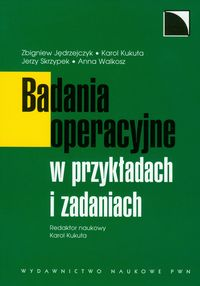

In [35]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["MAGAZYNY:", "Piekarnia:1","Piekarnia:2","Piekarnia:3","Piekarnia:4", " dodatkowy magazyn","Ilość dostaw z magazynów Ai"]
table.append_row(["M1",   50,    40,   50, 20, 5, 100 ])
table.append_row(["M2",   40,    80,   70, 30, 5, 50 ])
table.append_row(["M3",   60,    40,   70, 80, 6, 80 ])
table.append_row(["Popyt piekarni Bj",  40,   60,  50, 50,30, 230])

print(table)

+-----------+--------+--------+--------+--------+-----------+------------------+
| MAGAZYNY: | Piekar | Piekar | Piekar | Piekar |  dodatkow | Ilość dostaw z m |
|           | nia:1  | nia:2  | nia:3  | nia:4  | y magazyn |   agazynów Ai    |
+-----------+--------+--------+--------+--------+-----------+------------------+
|    M1     |   50   |   40   |   50   |   20   |     5     |       100        |
+-----------+--------+--------+--------+--------+-----------+------------------+
|    M2     |   40   |   80   |   70   |   30   |     5     |        50        |
+-----------+--------+--------+--------+--------+-----------+------------------+
|    M3     |   60   |   40   |   70   |   80   |     6     |        80        |
+-----------+--------+--------+--------+--------+-----------+------------------+
| Popyt pie |   40   |   60   |   50   |   50   |    30     |       230        |
| karni Bj  |        |        |        |        |           |                  |
+-----------+--------+------

### Zadania otwarte


<font size="6"> 
<font color="black">   
$\displaystyle \sum^{3}_{ {i=1}} A_{i} = 230  >  \displaystyle \sum^{4}_{ {j=1}} B_{j} = 200 t
$


<font size="2"> 
<font color="grey">   
$
\text{Otwarte zadanie transportowe (OZT)} \\
\text{podaż nie jest równa popytowi}
$

<font size="6"> 
<font color="black"> 
$
{
 \displaystyle {x_{(m,p)\,}}  \geqslant 0  {...} \forall  {m \in M},{p \in P} \\
}
$

<font size="2"> 
<font color="grey">
    
${    
\text{m,p - ilości dostaw reprezentowanych jako x są wieksze, równe zero} \\
\text{dla każdego elementu zbioru magazynów M i piekarni P} \\
}
$

<font size="6"> 
<font color="black"> 
$
{
 \displaystyle {x_{(m,p)\,}}  \in \mathbb{Z}^+  {...} \forall  {m \in M},{p \in P} \\
}
$

<font size="2"> 
<font color="grey">   

$ {   
\text{m,p - ilości dostaw reprezentowanych jako x należą do zbioru liczb całkowitych dodatnich} \\
\text{dla każdego elementu zbioru magazynów M i piekarni P} \\
}
$

<span style="font-size: 150%;color:#0000ff"> Funkcja celu</span>

<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {m \in M},{p \in P}} c_{(m,p)}x_{(m,p)} \to  min 
$


<font size="2"> 
<font color="grey">   
$
\text{Funkcja celu zmierza do minimalizacji sumy kosztów transportu z magazynów M do piekrani P} \\
\text{Suma kosztów transportu to suma iloczynów c - kosztów jednostkowych na tonę i x -ilości ton}
$

<span style="font-size: 150%;color:#0000ff"> Suma ograniczeń S</span>

- A1 = liczba skrzynek piwa do wysłania z magazynu A do baru 1
- A5 = liczba skrzynek piwa do wysłania z magazynu A do baru 5
- B1 = liczba skrzynek piwa do wysyłki z magazynu B do baru 1
- B5 = liczba skrzynek piwa do wysyłki z magazynu B do baru 5



#### $
\left\{
\begin{align} 
{m_1.1+m_1.2+m_1.3+m_1.4+m_1.5+m_1.d} & \leqslant 100 & (1)\\
{m_2.1+m_2.2+m_2.3+m_2.4+m_2.5+m_2.d} & \leqslant 50 & (2)\\
{m_3.1+m_3.2+m_3.3+m_3.4+m_3.5+m_3.d} & \leqslant 80 & (3)\\
\end{align}
\right. 
$



<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {b \in B}} x_{(w,b)} \leqslant  S_w {...} \forall  {w \in W}
$


<font size="2"> 
<font color="grey">   
$
\text{ilość skrzynek x nie może być większ niż ilość skrzynek w magazynie} \\
\text{z którego te skrzynki są transportowane}
$

tony mąki można ściągać z trzech różnych magazynów

#### $
\left\{
\begin{align} 
{m_1.1+ m_2.1 + m_3.1} & \geqslant 40 & (1)\\
{m_1.2+ m_2.2 + m_3.2} & \geqslant 60 & (2)\\
{m_1.3+ m_2.3 + m_3.3} & \geqslant 50 & (3)\\
{m_1.4+ m_2.4 + m_3.4} & \geqslant 50 & (4)\\
{m_1.d+ m_2.d + m_3.d} & \geqslant 30 & (4)\\
\end{align}
\right. 
$

<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {m \in M}, {p \in p}} x_{(m,p)} \geqslant  d_m {...} \forall  {m \in M}
$


<font size="2"> 
<font color="grey">   
$
\text{ilość ton x dostarczanych z magazynu m do piekarni P nie może być mniejsza niż popyt d} \\
\text{jaki występuje w danej piekarni p, dla każdej piekarni p ze zbioru piekarni P}
$

## ROZWIĄZANIE

In [36]:
from pulp import *

# Creates a list of all the supply nodes
Warehouses = ["mag1","mag2","mag3"]

# Creates a dictionary for the number of units of supply for each supply node
supply = {"mag1": 100,
          "mag2": 50,
          "mag3": 80}

# Creates a list of all demand nodes
Bars = ["piek1", "piek2", "piek3", "piek4","D"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {"piek1": 40,
        "piek2": 60,
        "piek3": 50,
        "piek4": 50,
        "D" : 30 
        }
print('Warehouses:',Warehouses)
print('supply:',supply)
print('Bars:',Bars)
print('Demand:',demand)

Warehouses: ['mag1', 'mag2', 'mag3']
supply: {'mag1': 100, 'mag2': 50, 'mag3': 80}
Bars: ['piek1', 'piek2', 'piek3', 'piek4', 'D']
Demand: {'piek1': 40, 'piek2': 60, 'piek3': 50, 'piek4': 50, 'D': 30}


In [37]:
# Creates a list of costs of each transportation path
#Bars
#1 2 3 4 5
costs = [   
        [50,40,50,20,5],#M1  Magazyny
        [40,80,70,30,5], #M2
        [60,40,70,80,6] #M3
         ]

In [38]:
# The cost data is made into a dictionary
costs = makeDict([Warehouses,Bars],costs,0)
costs

{'mag1': {'piek1': 50, 'piek2': 40, 'piek3': 50, 'piek4': 20, 'D': 5},
 'mag2': {'piek1': 40, 'piek2': 80, 'piek3': 70, 'piek4': 30, 'D': 5},
 'mag3': {'piek1': 60, 'piek2': 40, 'piek3': 70, 'piek4': 80, 'D': 6}}

In [39]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Beer Distribution Problem",LpMinimize)
print(prob)

Beer_Distribution_Problem:
MINIMIZE
None
VARIABLES



In [40]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in Warehouses for b in Bars]
print(Routes)

[('mag1', 'piek1'), ('mag1', 'piek2'), ('mag1', 'piek3'), ('mag1', 'piek4'), ('mag1', 'D'), ('mag2', 'piek1'), ('mag2', 'piek2'), ('mag2', 'piek3'), ('mag2', 'piek4'), ('mag2', 'D'), ('mag3', 'piek1'), ('mag3', 'piek2'), ('mag3', 'piek3'), ('mag3', 'piek4'), ('mag3', 'D')]


In [41]:
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Warehouses,Bars),0,None,LpInteger)
vars

{'mag1': {'piek1': Route_mag1_piek1,
  'piek2': Route_mag1_piek2,
  'piek3': Route_mag1_piek3,
  'piek4': Route_mag1_piek4,
  'D': Route_mag1_D},
 'mag2': {'piek1': Route_mag2_piek1,
  'piek2': Route_mag2_piek2,
  'piek3': Route_mag2_piek3,
  'piek4': Route_mag2_piek4,
  'D': Route_mag2_D},
 'mag3': {'piek1': Route_mag3_piek1,
  'piek2': Route_mag3_piek2,
  'piek3': Route_mag3_piek3,
  'piek4': Route_mag3_piek4,
  'D': Route_mag3_D}}

In [42]:
# The objective function is added to 'prob' first
prob += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]), "Sum_of_Transporting_Costs"
prob

Beer_Distribution_Problem:
MINIMIZE
5*Route_mag1_D + 50*Route_mag1_piek1 + 40*Route_mag1_piek2 + 50*Route_mag1_piek3 + 20*Route_mag1_piek4 + 5*Route_mag2_D + 40*Route_mag2_piek1 + 80*Route_mag2_piek2 + 70*Route_mag2_piek3 + 30*Route_mag2_piek4 + 6*Route_mag3_D + 60*Route_mag3_piek1 + 40*Route_mag3_piek2 + 70*Route_mag3_piek3 + 80*Route_mag3_piek4 + 0
VARIABLES
0 <= Route_mag1_D Integer
0 <= Route_mag1_piek1 Integer
0 <= Route_mag1_piek2 Integer
0 <= Route_mag1_piek3 Integer
0 <= Route_mag1_piek4 Integer
0 <= Route_mag2_D Integer
0 <= Route_mag2_piek1 Integer
0 <= Route_mag2_piek2 Integer
0 <= Route_mag2_piek3 Integer
0 <= Route_mag2_piek4 Integer
0 <= Route_mag3_D Integer
0 <= Route_mag3_piek1 Integer
0 <= Route_mag3_piek2 Integer
0 <= Route_mag3_piek3 Integer
0 <= Route_mag3_piek4 Integer

In [43]:
# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += lpSum([vars[w][b] for b in Bars])<=supply[w], "Sum_of_Products_out_of_Warehouse_%s"%w
prob

Beer_Distribution_Problem:
MINIMIZE
5*Route_mag1_D + 50*Route_mag1_piek1 + 40*Route_mag1_piek2 + 50*Route_mag1_piek3 + 20*Route_mag1_piek4 + 5*Route_mag2_D + 40*Route_mag2_piek1 + 80*Route_mag2_piek2 + 70*Route_mag2_piek3 + 30*Route_mag2_piek4 + 6*Route_mag3_D + 60*Route_mag3_piek1 + 40*Route_mag3_piek2 + 70*Route_mag3_piek3 + 80*Route_mag3_piek4 + 0
SUBJECT TO
Sum_of_Products_out_of_Warehouse_mag1: Route_mag1_D + Route_mag1_piek1
 + Route_mag1_piek2 + Route_mag1_piek3 + Route_mag1_piek4 <= 100

Sum_of_Products_out_of_Warehouse_mag2: Route_mag2_D + Route_mag2_piek1
 + Route_mag2_piek2 + Route_mag2_piek3 + Route_mag2_piek4 <= 50

Sum_of_Products_out_of_Warehouse_mag3: Route_mag3_D + Route_mag3_piek1
 + Route_mag3_piek2 + Route_mag3_piek3 + Route_mag3_piek4 <= 80

VARIABLES
0 <= Route_mag1_D Integer
0 <= Route_mag1_piek1 Integer
0 <= Route_mag1_piek2 Integer
0 <= Route_mag1_piek3 Integer
0 <= Route_mag1_piek4 Integer
0 <= Route_mag2_D Integer
0 <= Route_mag2_piek1 Integer
0 <= Route_mag2

In [44]:
# The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += lpSum([vars[w][b] for w in Warehouses])>=demand[b], "Sum_of_Products_into_Bar%s"%b
prob

Beer_Distribution_Problem:
MINIMIZE
5*Route_mag1_D + 50*Route_mag1_piek1 + 40*Route_mag1_piek2 + 50*Route_mag1_piek3 + 20*Route_mag1_piek4 + 5*Route_mag2_D + 40*Route_mag2_piek1 + 80*Route_mag2_piek2 + 70*Route_mag2_piek3 + 30*Route_mag2_piek4 + 6*Route_mag3_D + 60*Route_mag3_piek1 + 40*Route_mag3_piek2 + 70*Route_mag3_piek3 + 80*Route_mag3_piek4 + 0
SUBJECT TO
Sum_of_Products_out_of_Warehouse_mag1: Route_mag1_D + Route_mag1_piek1
 + Route_mag1_piek2 + Route_mag1_piek3 + Route_mag1_piek4 <= 100

Sum_of_Products_out_of_Warehouse_mag2: Route_mag2_D + Route_mag2_piek1
 + Route_mag2_piek2 + Route_mag2_piek3 + Route_mag2_piek4 <= 50

Sum_of_Products_out_of_Warehouse_mag3: Route_mag3_D + Route_mag3_piek1
 + Route_mag3_piek2 + Route_mag3_piek3 + Route_mag3_piek4 <= 80

Sum_of_Products_into_Barpiek1: Route_mag1_piek1 + Route_mag2_piek1
 + Route_mag3_piek1 >= 40

Sum_of_Products_into_Barpiek2: Route_mag1_piek2 + Route_mag2_piek2
 + Route_mag3_piek2 >= 60

Sum_of_Products_into_Barpiek3: Route_ma

In [45]:
# The problem data is written to an .lp file
prob.writeLP("BeerDistributionProblem.lp")

[Route_mag1_D,
 Route_mag1_piek1,
 Route_mag1_piek2,
 Route_mag1_piek3,
 Route_mag1_piek4,
 Route_mag2_D,
 Route_mag2_piek1,
 Route_mag2_piek2,
 Route_mag2_piek3,
 Route_mag2_piek4,
 Route_mag3_D,
 Route_mag3_piek1,
 Route_mag3_piek2,
 Route_mag3_piek3,
 Route_mag3_piek4]

In [46]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

1

In [47]:
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


In [48]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Route_mag1_D = 0.0
Route_mag1_piek1 = 0.0
Route_mag1_piek2 = 0.0
Route_mag1_piek3 = 50.0
Route_mag1_piek4 = 50.0
Route_mag2_D = 10.0
Route_mag2_piek1 = 40.0
Route_mag2_piek2 = 0.0
Route_mag2_piek3 = 0.0
Route_mag2_piek4 = 0.0
Route_mag3_D = 20.0
Route_mag3_piek1 = 0.0
Route_mag3_piek2 = 60.0
Route_mag3_piek3 = 0.0
Route_mag3_piek4 = 0.0


In [49]:
# The optimised objective function value is printed to the screen    
print("Total Cost of Transportation = ", value(prob.objective))

Total Cost of Transportation =  7670.0


# <span style="color:blue"> Przyklad 17 STR. 111

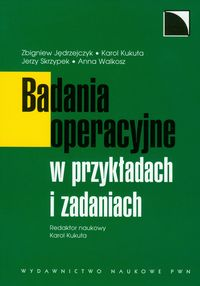

In [50]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Młyny:", "Piekarnia:1","Piekarnia:2","Piekarnia:3","Piekarnia:4", "Zdolności produkcyjne w młynach Ai", "Koszt produkcji 1 tony mąki"]
table.append_row(["M1",   50,    40,   50, 20,  100,1080 ])
table.append_row(["M2",   40,    80,   70, 30,  50, 1060 ])
table.append_row(["M3",   60,    40,   70, 80,  80, 1100 ])
table.append_row(["Popyt piekarni Bj",  40,   60,  50, 50, 0,0])

print(table)

+----------+-------+-------+--------+-------+-------------------+--------------+
|  Młyny:  | Pieka | Pieka | Piekar | Pieka | Zdolności produkc | Koszt produk |
|          | rnia: | rnia: | nia:3  | rnia: | yjne w młynach Ai | cji 1 tony m |
|          |   1   |   2   |        |   4   |                   |     ąki      |
+----------+-------+-------+--------+-------+-------------------+--------------+
|    M1    |  50   |  40   |   50   |  20   |        100        |     1080     |
+----------+-------+-------+--------+-------+-------------------+--------------+
|    M2    |  40   |  80   |   70   |  30   |        50         |     1060     |
+----------+-------+-------+--------+-------+-------------------+--------------+
|    M3    |  60   |  40   |   70   |  80   |        80         |     1100     |
+----------+-------+-------+--------+-------+-------------------+--------------+
| Popyt pi |  40   |  60   |   50   |  50   |         0         |      0       |
| ekarni B |       |       |

Przebudowywujemy tabelę początkową łacząc koszty transportu z kosztami produkcji. Tworzymy też dodatkowa kolumnę F.

In [51]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Młyny:", "Piekarnia:1","Piekarnia:2","Piekarnia:3","Piekarnia:4", " dodatkowy magazyn F","Zdolności produkcyjne w młynach Ai"]
table.append_row(["M1",   1130,    1120,   1130, 1100, 0, 100 ])
table.append_row(["M2",   1100,    1140,   1130, 1090, 0, 50])
table.append_row(["M3",   1160,    1140,   1170, 1180, 0, 80 ])
table.append_row(["Popyt piekarni Bj",  40,   60,  50, 30,30, 230])

print(table)

+----------+--------+--------+---------+-------+-----------+-------------------+
|  Młyny:  | Piekar | Piekar | Piekarn | Pieka |  dodatkow | Zdolności produkc |
|          | nia:1  | nia:2  |  ia:3   | rnia: | y magazyn | yjne w młynach Ai |
|          |        |        |         |   4   |     F     |                   |
+----------+--------+--------+---------+-------+-----------+-------------------+
|    M1    |  1130  |  1120  |  1130   | 1100  |     0     |        100        |
+----------+--------+--------+---------+-------+-----------+-------------------+
|    M2    |  1100  |  1140  |  1130   | 1090  |     0     |        50         |
+----------+--------+--------+---------+-------+-----------+-------------------+
|    M3    |  1160  |  1140  |  1170   | 1180  |     0     |        80         |
+----------+--------+--------+---------+-------+-----------+-------------------+
| Popyt pi |   40   |   60   |   50    |  30   |    30     |        230        |
| ekarni B |        |       

<font size="8"> 
<font color="green"> 
Zagadnienie otwarte transportowo-produkcyjne


<font size="6"> 
<font color="black">   
$\displaystyle \sum^{3}_{ {i=1}} A_{i} = 230  >  \displaystyle \sum^{4}_{ {j=1}} B_{j} = 200 t
$


<font size="2"> 
<font color="grey">   
$
\text{Otwarte zadanie transportowe (OZT)} \\
\text{podaż nie jest równa popytowi}
$

<font size="6"> 
<font color="black"> 
$
{
 \displaystyle {x_{(m,p)\,}}  \geqslant 0  {...} \forall  {m \in M},{p \in P} \\
}
$

<font size="2"> 
<font color="grey">
    
${    
\text{m,p - ilości dostaw reprezentowanych jako x są wieksze, równe zero} \\
\text{dla każdego elementu zbioru magazynów M i piekarni P} \\
}
$

<font size="6"> 
<font color="black"> 
$
{
 \displaystyle {x_{(m,p)\,}}  \in \mathbb{Z}^+  {...} \forall  {m \in M},{p \in P} \\
}
$

<font size="2"> 
<font color="grey">   

$ {   
\text{m,p - ilości dostaw reprezentowanych jako x należą do zbioru liczb całkowitych dodatnich} \\
\text{dla każdego elementu zbioru magazynów M i piekarni P} \\
}
$

<span style="font-size: 150%;color:#0000ff"> Funkcja celu</span>

<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {m \in M},{p \in P}} c_{(m,p)}x_{(m,p)} \to  min 
$


<font size="2"> 
<font color="grey">   
$
\text{Funkcja celu zmierza do minimalizacji sumy kosztów transportu z magazynów M do piekrani P} \\
\text{Suma kosztów transportu to suma iloczynów c - kosztów jednostkowych na tonę i x -ilości ton}
$

<span style="font-size: 150%;color:#0000ff"> Suma ograniczeń S</span>

- A1 = liczba skrzynek piwa do wysłania z magazynu A do baru 1
- A5 = liczba skrzynek piwa do wysłania z magazynu A do baru 5
- B1 = liczba skrzynek piwa do wysyłki z magazynu B do baru 1
- B5 = liczba skrzynek piwa do wysyłki z magazynu B do baru 5



#### $
\left\{
\begin{align} 
{m_1.1+m_1.2+m_1.3+m_1.4+m_1.5+m_1.f} & \leqslant 100 & (1)\\
{m_2.1+m_2.2+m_2.3+m_2.4+m_2.5+m_2.f} & \leqslant 50 & (2)\\
{m_3.1+m_3.2+m_3.3+m_3.4+m_3.5+m_3.f} & \leqslant 80 & (3)\\
\end{align}
\right. 
$



<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {b \in B}} x_{(w,b)} \leqslant  S_w {...} \forall  {w \in W}
$


<font size="2"> 
<font color="grey">   
$
\text{ilość skrzynek x nie może być większ niż ilość skrzynek w magazynie} \\
\text{z którego te skrzynki są transportowane}
$

tony mąki można ściągać z trzech różnych magazynów

#### $
\left\{
\begin{align} 
{m_1.1+ m_2.1 + m_3.1} & \geqslant 40 & (1)\\
{m_1.2+ m_2.2 + m_3.2} & \geqslant 60 & (2)\\
{m_1.3+ m_2.3 + m_3.3} & \geqslant 50 & (3)\\
{m_1.4+ m_2.4 + m_3.4} & \geqslant 50 & (4)\\
{m_1.d+ m_2.d + m_3.d} & \geqslant 30 & (4)\\
\end{align}
\right. 
$

<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {m \in M}, {p \in p}} x_{(m,p)} \geqslant  d_m {...} \forall  {m \in M}
$


<font size="2"> 
<font color="grey">   
$
\text{ilość ton x dostarczanych z magazynu m do piekarni P nie może być mniejsza niż popyt d} \\
\text{jaki występuje w danej piekarni p, dla każdej piekarni p ze zbioru piekarni P}
$

## ROZWIĄZANIE

In [52]:
from pulp import *

# Creates a list of all the supply nodes
Warehouses = ["m1","m2","m3"]

# Creates a dictionary for the number of units of supply for each supply node
supply = {"m1": 100,
          "m2": 50,
          "m3": 80}

# Creates a list of all demand nodes
Bars = ["P1", "P2", "P3", "P4","F"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {"P1": 40,
        "P2": 60,
        "P3": 50,
        "P4": 50,
        "F" : 30 
        }
print('Warehouses:',Warehouses)
print('supply:',supply)
print('Bars:',Bars)
print('Demand:',demand)

Warehouses: ['m1', 'm2', 'm3']
supply: {'m1': 100, 'm2': 50, 'm3': 80}
Bars: ['P1', 'P2', 'P3', 'P4', 'F']
Demand: {'P1': 40, 'P2': 60, 'P3': 50, 'P4': 50, 'F': 30}


In [53]:
# Creates a list of costs of each transportation path
#Bars
#1 2 3 4 5
costs = [   
        [1130,1120,1130,1100,0],#M1  Magazyny
        [1100,1140,1130,1090,0], #M2
        [1160,1140,1170,1180,0] #M3
         ]

In [54]:
# The cost data is made into a dictionary
costs = makeDict([Warehouses,Bars],costs,0)
costs

{'m1': {'P1': 1130, 'P2': 1120, 'P3': 1130, 'P4': 1100, 'F': 0},
 'm2': {'P1': 1100, 'P2': 1140, 'P3': 1130, 'P4': 1090, 'F': 0},
 'm3': {'P1': 1160, 'P2': 1140, 'P3': 1170, 'P4': 1180, 'F': 0}}

In [55]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Beer Distribution Problem",LpMinimize)
print(prob)

Beer_Distribution_Problem:
MINIMIZE
None
VARIABLES



In [56]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in Warehouses for b in Bars]
print(Routes)

[('m1', 'P1'), ('m1', 'P2'), ('m1', 'P3'), ('m1', 'P4'), ('m1', 'F'), ('m2', 'P1'), ('m2', 'P2'), ('m2', 'P3'), ('m2', 'P4'), ('m2', 'F'), ('m3', 'P1'), ('m3', 'P2'), ('m3', 'P3'), ('m3', 'P4'), ('m3', 'F')]


In [57]:
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Warehouses,Bars),0,None,LpInteger)
vars

{'m1': {'P1': Route_m1_P1,
  'P2': Route_m1_P2,
  'P3': Route_m1_P3,
  'P4': Route_m1_P4,
  'F': Route_m1_F},
 'm2': {'P1': Route_m2_P1,
  'P2': Route_m2_P2,
  'P3': Route_m2_P3,
  'P4': Route_m2_P4,
  'F': Route_m2_F},
 'm3': {'P1': Route_m3_P1,
  'P2': Route_m3_P2,
  'P3': Route_m3_P3,
  'P4': Route_m3_P4,
  'F': Route_m3_F}}

In [58]:
# The objective function is added to 'prob' first
prob += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]), "Sum_of_Transporting_Costs"
prob

Beer_Distribution_Problem:
MINIMIZE
1130*Route_m1_P1 + 1120*Route_m1_P2 + 1130*Route_m1_P3 + 1100*Route_m1_P4 + 1100*Route_m2_P1 + 1140*Route_m2_P2 + 1130*Route_m2_P3 + 1090*Route_m2_P4 + 1160*Route_m3_P1 + 1140*Route_m3_P2 + 1170*Route_m3_P3 + 1180*Route_m3_P4 + 0
VARIABLES
0 <= Route_m1_P1 Integer
0 <= Route_m1_P2 Integer
0 <= Route_m1_P3 Integer
0 <= Route_m1_P4 Integer
0 <= Route_m2_P1 Integer
0 <= Route_m2_P2 Integer
0 <= Route_m2_P3 Integer
0 <= Route_m2_P4 Integer
0 <= Route_m3_P1 Integer
0 <= Route_m3_P2 Integer
0 <= Route_m3_P3 Integer
0 <= Route_m3_P4 Integer

In [59]:
# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += lpSum([vars[w][b] for b in Bars])<=supply[w], "Sum_of_Products_out_of_Warehouse_%s"%w
prob

Beer_Distribution_Problem:
MINIMIZE
1130*Route_m1_P1 + 1120*Route_m1_P2 + 1130*Route_m1_P3 + 1100*Route_m1_P4 + 1100*Route_m2_P1 + 1140*Route_m2_P2 + 1130*Route_m2_P3 + 1090*Route_m2_P4 + 1160*Route_m3_P1 + 1140*Route_m3_P2 + 1170*Route_m3_P3 + 1180*Route_m3_P4 + 0
SUBJECT TO
Sum_of_Products_out_of_Warehouse_m1: Route_m1_F + Route_m1_P1 + Route_m1_P2
 + Route_m1_P3 + Route_m1_P4 <= 100

Sum_of_Products_out_of_Warehouse_m2: Route_m2_F + Route_m2_P1 + Route_m2_P2
 + Route_m2_P3 + Route_m2_P4 <= 50

Sum_of_Products_out_of_Warehouse_m3: Route_m3_F + Route_m3_P1 + Route_m3_P2
 + Route_m3_P3 + Route_m3_P4 <= 80

VARIABLES
0 <= Route_m1_F Integer
0 <= Route_m1_P1 Integer
0 <= Route_m1_P2 Integer
0 <= Route_m1_P3 Integer
0 <= Route_m1_P4 Integer
0 <= Route_m2_F Integer
0 <= Route_m2_P1 Integer
0 <= Route_m2_P2 Integer
0 <= Route_m2_P3 Integer
0 <= Route_m2_P4 Integer
0 <= Route_m3_F Integer
0 <= Route_m3_P1 Integer
0 <= Route_m3_P2 Integer
0 <= Route_m3_P3 Integer
0 <= Route_m3_P4 Integer

In [60]:
# The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += lpSum([vars[w][b] for w in Warehouses])>=demand[b], "Sum_of_Products_into_Bar%s"%b
prob

Beer_Distribution_Problem:
MINIMIZE
1130*Route_m1_P1 + 1120*Route_m1_P2 + 1130*Route_m1_P3 + 1100*Route_m1_P4 + 1100*Route_m2_P1 + 1140*Route_m2_P2 + 1130*Route_m2_P3 + 1090*Route_m2_P4 + 1160*Route_m3_P1 + 1140*Route_m3_P2 + 1170*Route_m3_P3 + 1180*Route_m3_P4 + 0
SUBJECT TO
Sum_of_Products_out_of_Warehouse_m1: Route_m1_F + Route_m1_P1 + Route_m1_P2
 + Route_m1_P3 + Route_m1_P4 <= 100

Sum_of_Products_out_of_Warehouse_m2: Route_m2_F + Route_m2_P1 + Route_m2_P2
 + Route_m2_P3 + Route_m2_P4 <= 50

Sum_of_Products_out_of_Warehouse_m3: Route_m3_F + Route_m3_P1 + Route_m3_P2
 + Route_m3_P3 + Route_m3_P4 <= 80

Sum_of_Products_into_BarP1: Route_m1_P1 + Route_m2_P1 + Route_m3_P1 >= 40

Sum_of_Products_into_BarP2: Route_m1_P2 + Route_m2_P2 + Route_m3_P2 >= 60

Sum_of_Products_into_BarP3: Route_m1_P3 + Route_m2_P3 + Route_m3_P3 >= 50

Sum_of_Products_into_BarP4: Route_m1_P4 + Route_m2_P4 + Route_m3_P4 >= 50

Sum_of_Products_into_BarF: Route_m1_F + Route_m2_F + Route_m3_F >= 30

VARIABLES
0 <= 

In [61]:
# The problem data is written to an .lp file
prob.writeLP("BeerDistributionProblem.lp")

[Route_m1_F,
 Route_m1_P1,
 Route_m1_P2,
 Route_m1_P3,
 Route_m1_P4,
 Route_m2_F,
 Route_m2_P1,
 Route_m2_P2,
 Route_m2_P3,
 Route_m2_P4,
 Route_m3_F,
 Route_m3_P1,
 Route_m3_P2,
 Route_m3_P3,
 Route_m3_P4]

In [62]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

1

In [63]:
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


In [64]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Route_m1_F = 0.0
Route_m1_P1 = 0.0
Route_m1_P2 = 10.0
Route_m1_P3 = 50.0
Route_m1_P4 = 40.0
Route_m2_F = 0.0
Route_m2_P1 = 40.0
Route_m2_P2 = 0.0
Route_m2_P3 = 0.0
Route_m2_P4 = 10.0
Route_m3_F = 30.0
Route_m3_P1 = 0.0
Route_m3_P2 = 50.0
Route_m3_P3 = 0.0
Route_m3_P4 = 0.0


In [65]:
# The optimised objective function value is printed to the screen    
print("Total Cost of Transportation = ", value(prob.objective))

Total Cost of Transportation =  223600.0


## to polączony koszt transportu i produkcji

In [66]:
10*1120+50*1130+40*1100+40*1100+10*1090+50*1140+30*0

223600

# <span style="color:blue"> Przyklad 18 STR. 114
# Zagadnienie lokalizacji produkcji    

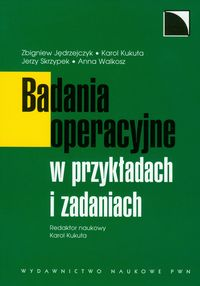

In [67]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Jednostkowe koszty produkcji i transportu masła: Cij:", "Miasto:P","Miasto:R","Miasto:S","Miasto:T", "Zdolności produkcji masła [kg] Ai", "Koszt produkcji 1 kg masła"]
table.append_row(["Lokalizacja: P",   0,  0.4,   0.5,   1,  3000, 8 ])
table.append_row(["Lokalizacja: R",   1,    0,   0.8, 0.6,  2000, 9 ])
table.append_row(["Lokalizacja: S", 0.5,  0.5,     0, 0.8,  2500, 8.4 ])
table.append_row(["Zapotrzebowanie na masło: Bj",  1000,   2000,  1000, 1000, 0,0])

print(table)

+---------------+----------+----------+----------+----------+---------+--------+
| Jednostkowe k | Miasto:P | Miasto:R | Miasto:S | Miasto:T | Zdolnoś | Koszt  |
| oszty produkc |          |          |          |          | ci prod | produk |
| ji i transpor |          |          |          |          | ukcji m | cji 1  |
| tu masła: Cij |          |          |          |          | asła [k | kg mas |
|       :       |          |          |          |          |  g] Ai  |   ła   |
+---------------+----------+----------+----------+----------+---------+--------+
| Lokalizacja:  |    0     |   0.4    |   0.5    |    1     |  3000   |   8    |
|       P       |          |          |          |          |         |        |
+---------------+----------+----------+----------+----------+---------+--------+
| Lokalizacja:  |    1     |    0     |   0.8    |   0.6    |  2000   |   9    |
|       R       |          |          |          |          |         |        |
+---------------+----------+

<font size="8"> 
<font color="green"> 
Zagadnienie otwarte transportowo-produkcyjne


<font size="3"> 
<font color="black">   
$\displaystyle \sum^{3}_{ {i=1}} A_{i} = 7500 kg_{zdolności produkcyjne} >  \displaystyle \sum^{4}_{ {j=1}} B_{j} = 5000 kg_{zapotrzebowanie na masło}
$


<font size="2"> 
<font color="grey">   
$
\text{Otwarte zadanie transportowo -produkcyjne (OZTP)} \\
\text{podaż nie jest równa popytowi}
$

Znowu trzeba to sprowadzić do zagadnienia zamkniętego - czyli zrównać popyt z podażą - naddatki upchnąć w magazynie. Tworzymy tabelę, która pokazuje całowite koszty = koszty produkcji+koszty transportu

In [68]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Jednostkowe koszty produkcji i transportu masła: Cij:", "Miasto:P","Miasto:R","Miasto:S","Miasto:T", "Magazyn","Zdolności produkcji masła [kg] Ai"]
table.append_row(["Lokalizacja: P",   8.0,  8.4,   8.5, 9.0, 0, 3000 ])
table.append_row(["Lokalizacja: R",  10.0,  9.0,   9.8, 9.6, 0, 2000 ])
table.append_row(["Lokalizacja: S",   8.9,  8.9,   8.4, 9.2, 0, 2500 ])
table.append_row(["Zapotrzebowanie na masło: Bj",  1000,   2000,  1000, 1000, 2500,7500])
print(table)

+--------------+----------+----------+----------+----------+---------+---------+
| Jednostkowe  | Miasto:P | Miasto:R | Miasto:S | Miasto:T | Magazyn | Zdolnoś |
| koszty produ |          |          |          |          |         | ci prod |
| kcji i trans |          |          |          |          |         | ukcji m |
| portu masła: |          |          |          |          |         | asła [k |
|     Cij:     |          |          |          |          |         |  g] Ai  |
+--------------+----------+----------+----------+----------+---------+---------+
| Lokalizacja: |   8.0    |   8.4    |   8.5    |   9.0    |    0    |  3000   |
|       P      |          |          |          |          |         |         |
+--------------+----------+----------+----------+----------+---------+---------+
| Lokalizacja: |   10.0   |   9.0    |   9.8    |   9.6    |    0    |  2000   |
|       R      |          |          |          |          |         |         |
+--------------+----------+-

<font size="8"> 
<font color="green"> 
Zagadnienie otwarte transportowo-produkcyjne


<font size="6"> 
<font color="black">   
$\displaystyle \sum^{3}_{ {i=1}} A_{i} = 230  >  \displaystyle \sum^{4}_{ {j=1}} B_{j} = 200 t
$


<font size="2"> 
<font color="grey">   
$
\text{Otwarte zadanie transportowe (OZT)} \\
\text{podaż nie jest równa popytowi}
$

<font size="6"> 
<font color="black"> 
$
{
 \displaystyle {x_{(m,p)\,}}  \geqslant 0  {...} \forall  {m \in M},{p \in P} \\
}
$

<font size="2"> 
<font color="grey">
    
${    
\text{m,p - ilości dostaw reprezentowanych jako x są wieksze, równe zero} \\
\text{dla każdego elementu zbioru magazynów M i piekarni P} \\
}
$

<font size="6"> 
<font color="black"> 
$
{
 \displaystyle {x_{(m,p)\,}}  \in \mathbb{Z}^+  {...} \forall  {m \in M},{p \in P} \\
}
$

<font size="2"> 
<font color="grey">   

$ {   
\text{m,p - ilości dostaw reprezentowanych jako x należą do zbioru liczb całkowitych dodatnich} \\
\text{dla każdego elementu zbioru magazynów M i piekarni P} \\
}
$

<span style="font-size: 150%;color:#0000ff"> Funkcja celu</span>

<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {m \in M},{p \in P}} c_{(m,p)}x_{(m,p)} \to  min 
$


<font size="2"> 
<font color="grey">   
$
\text{Funkcja celu zmierza do minimalizacji sumy kosztów transportu z magazynów M do piekrani P} \\
\text{Suma kosztów transportu to suma iloczynów c - kosztów jednostkowych na tonę i x -ilości ton}
$

<span style="font-size: 150%;color:#0000ff"> Suma ograniczeń S</span>

#### $
\left\{
\begin{align} 
{k_P.P+m_1.2+m_1.3+m_1.4+m_1.5+m_1.f} & \leqslant 100 & (1)\\
{m_2.1+m_2.2+m_2.3+m_2.4+m_2.5+m_2.f} & \leqslant 50 & (2)\\
{m_3.1+m_3.2+m_3.3+m_3.4+m_3.5+m_3.f} & \leqslant 80 & (3)\\
\end{align}
\right. 
$



<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {b \in B}} x_{(w,b)} \leqslant  S_w {...} \forall  {w \in W}
$


<font size="2"> 
<font color="grey">   
$
\text{ilość skrzynek x nie może być większ niż ilość skrzynek w magazynie} \\
\text{z którego te skrzynki są transportowane}
$

tony mąki można ściągać z trzech różnych magazynów

#### $
\left\{
\begin{align} 
{m_1.1+ m_2.1 + m_3.1} & \geqslant 40 & (1)\\
{m_1.2+ m_2.2 + m_3.2} & \geqslant 60 & (2)\\
{m_1.3+ m_2.3 + m_3.3} & \geqslant 50 & (3)\\
{m_1.4+ m_2.4 + m_3.4} & \geqslant 50 & (4)\\
{m_1.d+ m_2.d + m_3.d} & \geqslant 30 & (4)\\
\end{align}
\right. 
$

<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {m \in M}, {p \in p}} x_{(m,p)} \geqslant  d_m {...} \forall  {m \in M}
$


<font size="2"> 
<font color="grey">   
$
\text{ilość ton x dostarczanych z magazynu m do piekarni P nie może być mniejsza niż popyt d} \\
\text{jaki występuje w danej piekarni p, dla każdej piekarni p ze zbioru piekarni P}
$

## ROZWIĄZANIE

In [69]:
from pulp import *

# Creates a list of all the supply nodes
Warehouses = ["factory_P","factory_R","factory_S"]

# Creates a dictionary for the number of units of supply for each supply node
supply = {"factory_P": 3000,
          "factory_R": 2000,
          "factory_S": 2500}

# Creates a list of all demand nodes
Bars = ["City_P", "City_R", "City_S", "City_T","Magazyn_F"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {"City_P": 1000,
        "City_R": 2000,
        "City_S": 1000,
        "City_T": 1000,
        "Magazyn_F" : 2500 
        }
print('Warehouses:',Warehouses)
print('supply:',supply)
print('Bars:',Bars)
print('Demand:',demand)

Warehouses: ['factory_P', 'factory_R', 'factory_S']
supply: {'factory_P': 3000, 'factory_R': 2000, 'factory_S': 2500}
Bars: ['City_P', 'City_R', 'City_S', 'City_T', 'Magazyn_F']
Demand: {'City_P': 1000, 'City_R': 2000, 'City_S': 1000, 'City_T': 1000, 'Magazyn_F': 2500}


In [70]:
# Creates a list of costs of each transportation path
#Bars
#1 2 3 4 5
costs = [   
        [8,8.4,8.5,9,0],#M1  Magazyny
        [10,9,9.8,9.6,0], #M2
        [8.9,8.9,8.4,9.2,0] #M3
         ]

In [71]:
# The cost data is made into a dictionary
costs = makeDict([Warehouses,Bars],costs,0)
costs

{'factory_P': {'City_P': 8,
  'City_R': 8.4,
  'City_S': 8.5,
  'City_T': 9,
  'Magazyn_F': 0},
 'factory_R': {'City_P': 10,
  'City_R': 9,
  'City_S': 9.8,
  'City_T': 9.6,
  'Magazyn_F': 0},
 'factory_S': {'City_P': 8.9,
  'City_R': 8.9,
  'City_S': 8.4,
  'City_T': 9.2,
  'Magazyn_F': 0}}

In [72]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Beer Distribution Problem",LpMinimize)
print(prob)

Beer_Distribution_Problem:
MINIMIZE
None
VARIABLES



In [73]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in Warehouses for b in Bars]
print(Routes)

[('factory_P', 'City_P'), ('factory_P', 'City_R'), ('factory_P', 'City_S'), ('factory_P', 'City_T'), ('factory_P', 'Magazyn_F'), ('factory_R', 'City_P'), ('factory_R', 'City_R'), ('factory_R', 'City_S'), ('factory_R', 'City_T'), ('factory_R', 'Magazyn_F'), ('factory_S', 'City_P'), ('factory_S', 'City_R'), ('factory_S', 'City_S'), ('factory_S', 'City_T'), ('factory_S', 'Magazyn_F')]


In [74]:
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Warehouses,Bars),0,None,LpInteger)
vars

{'factory_P': {'City_P': Route_factory_P_City_P,
  'City_R': Route_factory_P_City_R,
  'City_S': Route_factory_P_City_S,
  'City_T': Route_factory_P_City_T,
  'Magazyn_F': Route_factory_P_Magazyn_F},
 'factory_R': {'City_P': Route_factory_R_City_P,
  'City_R': Route_factory_R_City_R,
  'City_S': Route_factory_R_City_S,
  'City_T': Route_factory_R_City_T,
  'Magazyn_F': Route_factory_R_Magazyn_F},
 'factory_S': {'City_P': Route_factory_S_City_P,
  'City_R': Route_factory_S_City_R,
  'City_S': Route_factory_S_City_S,
  'City_T': Route_factory_S_City_T,
  'Magazyn_F': Route_factory_S_Magazyn_F}}

In [75]:
# The objective function is added to 'prob' first
prob += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]), "Sum_of_Transporting_Costs"
prob

Beer_Distribution_Problem:
MINIMIZE
8*Route_factory_P_City_P + 8.4*Route_factory_P_City_R + 8.5*Route_factory_P_City_S + 9*Route_factory_P_City_T + 10*Route_factory_R_City_P + 9*Route_factory_R_City_R + 9.8*Route_factory_R_City_S + 9.6*Route_factory_R_City_T + 8.9*Route_factory_S_City_P + 8.9*Route_factory_S_City_R + 8.4*Route_factory_S_City_S + 9.2*Route_factory_S_City_T + 0.0
VARIABLES
0 <= Route_factory_P_City_P Integer
0 <= Route_factory_P_City_R Integer
0 <= Route_factory_P_City_S Integer
0 <= Route_factory_P_City_T Integer
0 <= Route_factory_R_City_P Integer
0 <= Route_factory_R_City_R Integer
0 <= Route_factory_R_City_S Integer
0 <= Route_factory_R_City_T Integer
0 <= Route_factory_S_City_P Integer
0 <= Route_factory_S_City_R Integer
0 <= Route_factory_S_City_S Integer
0 <= Route_factory_S_City_T Integer

In [76]:
# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += lpSum([vars[w][b] for b in Bars])<=supply[w], "Sum_of_Products_out_of_Warehouse_%s"%w
prob

Beer_Distribution_Problem:
MINIMIZE
8*Route_factory_P_City_P + 8.4*Route_factory_P_City_R + 8.5*Route_factory_P_City_S + 9*Route_factory_P_City_T + 10*Route_factory_R_City_P + 9*Route_factory_R_City_R + 9.8*Route_factory_R_City_S + 9.6*Route_factory_R_City_T + 8.9*Route_factory_S_City_P + 8.9*Route_factory_S_City_R + 8.4*Route_factory_S_City_S + 9.2*Route_factory_S_City_T + 0.0
SUBJECT TO
Sum_of_Products_out_of_Warehouse_factory_P: Route_factory_P_City_P
 + Route_factory_P_City_R + Route_factory_P_City_S + Route_factory_P_City_T
 + Route_factory_P_Magazyn_F <= 3000

Sum_of_Products_out_of_Warehouse_factory_R: Route_factory_R_City_P
 + Route_factory_R_City_R + Route_factory_R_City_S + Route_factory_R_City_T
 + Route_factory_R_Magazyn_F <= 2000

Sum_of_Products_out_of_Warehouse_factory_S: Route_factory_S_City_P
 + Route_factory_S_City_R + Route_factory_S_City_S + Route_factory_S_City_T
 + Route_factory_S_Magazyn_F <= 2500

VARIABLES
0 <= Route_factory_P_City_P Integer
0 <= Route_factory_

In [77]:
# The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += lpSum([vars[w][b] for w in Warehouses])>=demand[b], "Sum_of_Products_into_Bar%s"%b
prob

Beer_Distribution_Problem:
MINIMIZE
8*Route_factory_P_City_P + 8.4*Route_factory_P_City_R + 8.5*Route_factory_P_City_S + 9*Route_factory_P_City_T + 10*Route_factory_R_City_P + 9*Route_factory_R_City_R + 9.8*Route_factory_R_City_S + 9.6*Route_factory_R_City_T + 8.9*Route_factory_S_City_P + 8.9*Route_factory_S_City_R + 8.4*Route_factory_S_City_S + 9.2*Route_factory_S_City_T + 0.0
SUBJECT TO
Sum_of_Products_out_of_Warehouse_factory_P: Route_factory_P_City_P
 + Route_factory_P_City_R + Route_factory_P_City_S + Route_factory_P_City_T
 + Route_factory_P_Magazyn_F <= 3000

Sum_of_Products_out_of_Warehouse_factory_R: Route_factory_R_City_P
 + Route_factory_R_City_R + Route_factory_R_City_S + Route_factory_R_City_T
 + Route_factory_R_Magazyn_F <= 2000

Sum_of_Products_out_of_Warehouse_factory_S: Route_factory_S_City_P
 + Route_factory_S_City_R + Route_factory_S_City_S + Route_factory_S_City_T
 + Route_factory_S_Magazyn_F <= 2500

Sum_of_Products_into_BarCity_P: Route_factory_P_City_P
 + Route_f

In [78]:
# The problem data is written to an .lp file
prob.writeLP("BeerDistributionProblem.lp")

[Route_factory_P_City_P,
 Route_factory_P_City_R,
 Route_factory_P_City_S,
 Route_factory_P_City_T,
 Route_factory_P_Magazyn_F,
 Route_factory_R_City_P,
 Route_factory_R_City_R,
 Route_factory_R_City_S,
 Route_factory_R_City_T,
 Route_factory_R_Magazyn_F,
 Route_factory_S_City_P,
 Route_factory_S_City_R,
 Route_factory_S_City_S,
 Route_factory_S_City_T,
 Route_factory_S_Magazyn_F]

In [79]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

1

In [80]:
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


In [81]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Route_factory_P_City_P = 1000.0
Route_factory_P_City_R = 2000.0
Route_factory_P_City_S = 0.0
Route_factory_P_City_T = 0.0
Route_factory_P_Magazyn_F = 0.0
Route_factory_R_City_P = 0.0
Route_factory_R_City_R = 0.0
Route_factory_R_City_S = 0.0
Route_factory_R_City_T = 0.0
Route_factory_R_Magazyn_F = 2000.0
Route_factory_S_City_P = 0.0
Route_factory_S_City_R = 0.0
Route_factory_S_City_S = 1000.0
Route_factory_S_City_T = 1000.0
Route_factory_S_Magazyn_F = 500.0


In [82]:
# The optimised objective function value is printed to the screen    
print("Total Cost of Transportation = ", value(prob.objective))

Total Cost of Transportation =  42400.0


# <span style="color:blue"> Przyklad 19 STR. 117
# Minimalizacja pustych przebiegów    

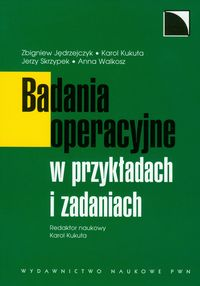

In [83]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["dij:", "Miasto:L","Miasto:M","Miasto:N","Miasto:O","Miasto:P","Miasto:R","Miasto:S", "WYWOZY [ton]: wi"]
table.append_row(["Miasto:L",   0,  20,   50,   100,  150, 200, 100, 1000])
table.append_row(["Miasto:M",  "",  20,   50,   100,  150, 200, 100, 2000 ])
table.append_row(["Miasto:N",  "", "",   50,   100,  150, 200, 100, 1000 ])
table.append_row(["Miasto:O",  "",  "",   "",   100,  150, 200, 100, 100 ])
table.append_row(["Miasto:P",  "", "",   "",   "",  150, 200, 100, 200 ])
table.append_row(["Miasto:R",  "",  "",   "",   "",  "", 200, 100, 1000 ])
table.append_row(["Miasto:S",  "",  "",   "",   "",  "", "", 100, 500 ])
table.append_row(["przywozy [ton]: pi",   500,  1000,   2000,   1000,  1000, 300, 0, 5800])

print(table)

+--------------+--------+--------+------+------+------+------+------+----------+
|     dij:     | Miasto | Miasto | Mias | Mias | Mias | Mias | Mias | WYWOZY [ |
|              |   :L   |   :M   | to:N | to:O | to:P | to:R | to:S | ton]: wi |
+--------------+--------+--------+------+------+------+------+------+----------+
|   Miasto:L   |   0    |   20   |  50  | 100  | 150  | 200  | 100  |   1000   |
+--------------+--------+--------+------+------+------+------+------+----------+
|   Miasto:M   |        |   20   |  50  | 100  | 150  | 200  | 100  |   2000   |
+--------------+--------+--------+------+------+------+------+------+----------+
|   Miasto:N   |        |        |  50  | 100  | 150  | 200  | 100  |   1000   |
+--------------+--------+--------+------+------+------+------+------+----------+
|   Miasto:O   |        |        |      | 100  | 150  | 200  | 100  |   100    |
+--------------+--------+--------+------+------+------+------+------+----------+
|   Miasto:P   |        |   

Ile odbiera miasto (pi) ile dostarcza miasto (wi) 

ładowność samochodów: 50 ton (ale ktoś miał pojęcie, jest ograniczenia masa całkowita 40 ton)

Miasto L

Miasto L przywozi z innych miast 500 ton towarów, podzielić przez jego ładowność 50 ton = 10 kursów przywozowych
Miasto L wywozi do innych miesięcznie miast 1000 ton podzielić na 50 ton = 20 kursów wywozowych do innych miast

Samochody z miasta L więcej wywożą niż przywożą: 10 - 20 = -10 kursów 

Miasta:
- L:   500:50 - 1000:50 = -10
- M:   1000:50 -2000:50 = -20
- N:   2000:50 -1000:50 =  20
- O:   1000:50 - 100:50 =  18
- P:   1000:50 - 200:50 =  16
- R:    300:50 - 1000:50 = -14
- S:      0:50 - 500:50 =  -10




Ujemne to są miasta dostawcy mają znaki ujemnt. To są miasta: L, M i R, S\
Dodatnie to są miasta odbiorcy bo mają więcej odbiorów niż wysyłek. To miasta: N,O,P 
Różnica między ilością wysyłek a ilością odbiorów to ilość pustych samochodów.

In [84]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["dij:", "Dostawca_Miasto:L","Dostawca_Miasto:M","Dostawca_Miasto:R","Dostawca_Miasto:S", "ai"]
table.append_row(["Odbiorca_Miasto:N",  50, 40,   200,   100,  20 ])
table.append_row(["Dostawca_Miasto:O",  100, 20,   30,   150,  18 ])
table.append_row(["Dostawca_Miasto:P",  150, 30,   80,   70,  16 ])
table.append_row(["bj",   10,  20,   14,   10,  54])

print(table)

+-----------------+-------------+-------------+-------------+-------------+----+
|      dij:       | Dostawca_Mi | Dostawca_Mi | Dostawca_Mi | Dostawca_Mi | ai |
|                 |   asto:L    |   asto:M    |   asto:R    |   asto:S    |    |
+-----------------+-------------+-------------+-------------+-------------+----+
| Odbiorca_Miasto |     50      |     40      |     200     |     100     | 20 |
|       :N        |             |             |             |             |    |
+-----------------+-------------+-------------+-------------+-------------+----+
| Dostawca_Miasto |     100     |     20      |     30      |     150     | 18 |
|       :O        |             |             |             |             |    |
+-----------------+-------------+-------------+-------------+-------------+----+
| Dostawca_Miasto |     150     |     30      |     80      |     70      | 16 |
|       :P        |             |             |             |             |    |
+-----------------+---------

Zmienne decyzyjne xij oznaczają liczbę pustych samochodów.

- bj - suma ilości dostaw 
- ai -suma ilości odbiorów


<span style="font-size: 150%;color:#0000ff"> Suma ograniczeń S</span>

#### $
\left\{
\begin{align} 
{k_P.P+m_1.2+m_1.3+m_1.4+m_1.5+m_1.f} & \leqslant 100 & (1)\\
{m_2.1+m_2.2+m_2.3+m_2.4+m_2.5+m_2.f} & \leqslant 50 & (2)\\
{m_3.1+m_3.2+m_3.3+m_3.4+m_3.5+m_3.f} & \leqslant 80 & (3)\\
\end{align}
\right. 
$



<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {b \in B}} x_{(w,b)} \leqslant  S_w {...} \forall  {w \in W}
$


<font size="2"> 
<font color="grey">   
$
\text{ilość skrzynek x nie może być większ niż ilość skrzynek w magazynie} \\
\text{z którego te skrzynki są transportowane}
$

tony mąki można ściągać z trzech różnych magazynów

#### $
\left\{
\begin{align} 
{m_1.1+ m_2.1 + m_3.1} & \geqslant 40 & (1)\\
{m_1.2+ m_2.2 + m_3.2} & \geqslant 60 & (2)\\
{m_1.3+ m_2.3 + m_3.3} & \geqslant 50 & (3)\\
{m_1.4+ m_2.4 + m_3.4} & \geqslant 50 & (4)\\
{m_1.d+ m_2.d + m_3.d} & \geqslant 30 & (4)\\
\end{align}
\right. 
$

<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {m \in M}, {p \in p}} x_{(m,p)} \geqslant  d_m {...} \forall  {m \in M}
$


<font size="2"> 
<font color="grey">   
$
\text{ilość ton x dostarczanych z magazynu m do piekarni P nie może być mniejsza niż popyt d} \\
\text{jaki występuje w danej piekarni p, dla każdej piekarni p ze zbioru piekarni P}
$

## ROZWIĄZANIE

In [85]:
from pulp import *

# Tworzę listę dostawców
Warehouses = ["N","O","P"]

# Tworzę słownik ile dostawcy mogą dostarczyć
supply = {"N": 20,
          "O": 18,
          "P": 16}

# Creates a list of all demand nodes
Bars = ["L", "M", "R", "S"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {"L": 10,
        "M": 20,
        "R": 14,
        "S": 10
        }
print('Warehouses:',Warehouses)
print('supply:',supply)
print('Bars:',Bars)
print('Demand:',demand)

Warehouses: ['N', 'O', 'P']
supply: {'N': 20, 'O': 18, 'P': 16}
Bars: ['L', 'M', 'R', 'S']
Demand: {'L': 10, 'M': 20, 'R': 14, 'S': 10}


In [86]:
# Tworzę macierz ilości transportów
        #Bars
        #1 2   3   4 5
costs = [   
        [50,40,200,100],#M1  Magazyny
        [100,20,30,150], #M2
        [150,30,80,70] #M3
         ]

In [87]:
# The cost data is made into a dictionary
costs = makeDict([Warehouses,Bars],costs,0)
costs

{'N': {'L': 50, 'M': 40, 'R': 200, 'S': 100},
 'O': {'L': 100, 'M': 20, 'R': 30, 'S': 150},
 'P': {'L': 150, 'M': 30, 'R': 80, 'S': 70}}

In [88]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Beer Distribution Problem",LpMinimize)
print(prob)

Beer_Distribution_Problem:
MINIMIZE
None
VARIABLES



In [89]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in Warehouses for b in Bars]
print(Routes)

[('N', 'L'), ('N', 'M'), ('N', 'R'), ('N', 'S'), ('O', 'L'), ('O', 'M'), ('O', 'R'), ('O', 'S'), ('P', 'L'), ('P', 'M'), ('P', 'R'), ('P', 'S')]


In [90]:
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Warehouses,Bars),0,None,LpInteger)
vars

{'N': {'L': Route_N_L, 'M': Route_N_M, 'R': Route_N_R, 'S': Route_N_S},
 'O': {'L': Route_O_L, 'M': Route_O_M, 'R': Route_O_R, 'S': Route_O_S},
 'P': {'L': Route_P_L, 'M': Route_P_M, 'R': Route_P_R, 'S': Route_P_S}}

In [91]:
# The objective function is added to 'prob' first
prob += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]), "Sum_of_Transporting_Costs"
prob

Beer_Distribution_Problem:
MINIMIZE
50*Route_N_L + 40*Route_N_M + 200*Route_N_R + 100*Route_N_S + 100*Route_O_L + 20*Route_O_M + 30*Route_O_R + 150*Route_O_S + 150*Route_P_L + 30*Route_P_M + 80*Route_P_R + 70*Route_P_S + 0
VARIABLES
0 <= Route_N_L Integer
0 <= Route_N_M Integer
0 <= Route_N_R Integer
0 <= Route_N_S Integer
0 <= Route_O_L Integer
0 <= Route_O_M Integer
0 <= Route_O_R Integer
0 <= Route_O_S Integer
0 <= Route_P_L Integer
0 <= Route_P_M Integer
0 <= Route_P_R Integer
0 <= Route_P_S Integer

In [92]:
# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += lpSum([vars[w][b] for b in Bars])<=supply[w], "Sum_of_Products_out_of_Warehouse_%s"%w
prob

Beer_Distribution_Problem:
MINIMIZE
50*Route_N_L + 40*Route_N_M + 200*Route_N_R + 100*Route_N_S + 100*Route_O_L + 20*Route_O_M + 30*Route_O_R + 150*Route_O_S + 150*Route_P_L + 30*Route_P_M + 80*Route_P_R + 70*Route_P_S + 0
SUBJECT TO
Sum_of_Products_out_of_Warehouse_N: Route_N_L + Route_N_M + Route_N_R
 + Route_N_S <= 20

Sum_of_Products_out_of_Warehouse_O: Route_O_L + Route_O_M + Route_O_R
 + Route_O_S <= 18

Sum_of_Products_out_of_Warehouse_P: Route_P_L + Route_P_M + Route_P_R
 + Route_P_S <= 16

VARIABLES
0 <= Route_N_L Integer
0 <= Route_N_M Integer
0 <= Route_N_R Integer
0 <= Route_N_S Integer
0 <= Route_O_L Integer
0 <= Route_O_M Integer
0 <= Route_O_R Integer
0 <= Route_O_S Integer
0 <= Route_P_L Integer
0 <= Route_P_M Integer
0 <= Route_P_R Integer
0 <= Route_P_S Integer

In [93]:
# The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += lpSum([vars[w][b] for w in Warehouses])>=demand[b], "Sum_of_Products_into_Bar%s"%b
prob

Beer_Distribution_Problem:
MINIMIZE
50*Route_N_L + 40*Route_N_M + 200*Route_N_R + 100*Route_N_S + 100*Route_O_L + 20*Route_O_M + 30*Route_O_R + 150*Route_O_S + 150*Route_P_L + 30*Route_P_M + 80*Route_P_R + 70*Route_P_S + 0
SUBJECT TO
Sum_of_Products_out_of_Warehouse_N: Route_N_L + Route_N_M + Route_N_R
 + Route_N_S <= 20

Sum_of_Products_out_of_Warehouse_O: Route_O_L + Route_O_M + Route_O_R
 + Route_O_S <= 18

Sum_of_Products_out_of_Warehouse_P: Route_P_L + Route_P_M + Route_P_R
 + Route_P_S <= 16

Sum_of_Products_into_BarL: Route_N_L + Route_O_L + Route_P_L >= 10

Sum_of_Products_into_BarM: Route_N_M + Route_O_M + Route_P_M >= 20

Sum_of_Products_into_BarR: Route_N_R + Route_O_R + Route_P_R >= 14

Sum_of_Products_into_BarS: Route_N_S + Route_O_S + Route_P_S >= 10

VARIABLES
0 <= Route_N_L Integer
0 <= Route_N_M Integer
0 <= Route_N_R Integer
0 <= Route_N_S Integer
0 <= Route_O_L Integer
0 <= Route_O_M Integer
0 <= Route_O_R Integer
0 <= Route_O_S Integer
0 <= Route_P_L Integer
0 <= Ro

In [94]:
# The problem data is written to an .lp file
prob.writeLP("BeerDistributionProblem.lp")

[Route_N_L,
 Route_N_M,
 Route_N_R,
 Route_N_S,
 Route_O_L,
 Route_O_M,
 Route_O_R,
 Route_O_S,
 Route_P_L,
 Route_P_M,
 Route_P_R,
 Route_P_S]

In [95]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

1

In [96]:
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


In [97]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Route_N_L = 10.0
Route_N_M = 10.0
Route_N_R = 0.0
Route_N_S = 0.0
Route_O_L = 0.0
Route_O_M = 4.0
Route_O_R = 14.0
Route_O_S = 0.0
Route_P_L = 0.0
Route_P_M = 6.0
Route_P_R = 0.0
Route_P_S = 10.0


In [98]:
# The optimised objective function value is printed to the screen    
print("Total Cost of Transportation = ", value(prob.objective))

Total Cost of Transportation =  2280.0


<span style="font-size: 150%;color:#0000ff"> Aby puste przebigi były minimalne należy poprzesuwać samochody tak jak to pokazane: z miasta N do miasta L przesłać 10 samochodów itd. 